<a class="anchor" id="0"></a>
# [University of Liverpool - Ion Switching](https://www.kaggle.com/c/liverpool-ion-switching)

## The kernel initially consist of a thorough overview of the parameters of all successful commits, the result (LB) obtained and their analysis (see section "My upgrade").

## I developed a shell to build different models, check the result of their work, using Confusion matrices and weighted average of their predictions.

## I am experimenting with different good kernels for FE, models and their tuning. Already used more 10 different basic kernels (in each commit their list is in the "Acknowledgements" section and - in the kernel's code when the code was taken from the basic kernel unchanged or almost unchanged).

In the section "Acknowledgements" I make a link to the basic kernel where I got the code from, and to where the code came from in the this basic kernel (the original source), after that I upvoted all these good kernels.

# Acknowledgements

* [Physically Possible](https://www.kaggle.com/jazivxt/physically-possible)
* [Simple EDA-Model](https://www.kaggle.com/siavrez/simple-eda-model)
* [MM 2020 NCAAM: LGB, XGB, LogReg - Tuning&Merging](https://www.kaggle.com/vbmokin/mm-2020-ncaam-lgb-xgb-logreg-tuning-merging)
* [Merging FE & Prediction - xgb, lgb, logr, linr](https://www.kaggle.com/vbmokin/merging-fe-prediction-xgb-lgb-logr-linr)
* [BOD prediction in river - 15 regression models](https://www.kaggle.com/vbmokin/bod-prediction-in-river-15-regression-models)
* [Automatic selection from 20 classifier models](https://www.kaggle.com/vbmokin/automatic-selection-from-20-classifier-models)
* [💥3 Simple Ideas [Ensemble]](https://www.kaggle.com/teejmahal20/3-simple-ideas-ensemble)

<a class="anchor" id="0.1"></a>
## Table of Contents

1. [My upgrade](#1)
    -  [Commit now](#1.1)
    -  [Previous commits: LGB-1, FE-1,2](#1.2)
    -  [Previous commits: LGB-2, FE-3](#1.3)
    -  [Previous commits: LGB-2, MLP, LogReg, FE-3](#1.4)
    -  [Previous commits: Advanced FE & LGB-2](#1.5)
    -  [Previous commits: Advanced FE & LGB-2 & XGB-1](#1.6)
1. [Import libraries](#2)
1. [Download data & FE](#3)
1. [Models tuning](#4)
    -  [Ridge Regression](#4.1)
    -  [SGDRegressor](#4.2)    
    -  [Logistic Regression](#4.3)
    -  [MLP](#4.4)
    -  [LGB](#4.5)
    -  [XGB](#4.6)
1. [Showing Confusion Matrices](#5)
1. [Comparison and merging solutions](#6)
1. [Submission](#7)

## 1. My upgrade<a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

The using and tuning different regression models and tuning LGB models, MLP model, building Confusion matrices, selection of seed_random.

## 1.1. Commit now <a class="anchor" id="1.1"></a>

[Back to Table of Contents](#0.1)

In [34]:
# FE-2 & FE-3

# Seed for random_state
seed_random = 42

# FE-2 : window_sizes = [10, 25, 50, 100, 500, 1000, 5000, 10000, 25000, 50000, 100000, 500000]
# About selection of these values see my post: https://www.kaggle.com/c/liverpool-ion-switching/discussion/135073
window_sizes = [10, 50]
# with new my features: signal_shift_+2, signal_shift_-2
# without ratio-, diff-features
# without 'medianbatch', 'abs_avgbatch', 'abs_maxbatch' with smallest feature importance

# LGB-2 model tuning
lr_lgb = 0.03
num_leaves = 200
num_iterations = 2000
# 'metric'is 'logloss'

# XGB-1 model tuning
lr_xgb = 0.03
max_depth_xgb = 10
num_boost_round_xgb = 1000
# 'eval_metric'is 'logloss'

# Set weight of models
w_lgb = 0.5
w_xgb = 1 - w_lgb
print(w_xgb)
# without LogReg, MLP, Ridge Regression and SGDRegressor models

0.5


* Variant 1 of FE (FE-1) from the kernels: https://www.kaggle.com/suicaokhoailang/an-embarrassingly-simple-baseline-0-960-lb and https://www.kaggle.com/tunguz/simple-ion-ridge-regression-starter
* Variant 2 of FE (FE-2) from the kernel: https://www.kaggle.com/teejmahal20/regression-with-optimized-rounder and https://www.kaggle.com/pestipeti/eda-ion-switching
* Variant 3 of FE (FE-3) from the kernels: https://www.kaggle.com/jazivxt/physically-possible and https://www.kaggle.com/siavrez/simple-eda-model

* LGB model 1 (LGB-1) from the kernel https://www.kaggle.com/teejmahal20/regression-with-optimized-rounder
* LGB model 2 (LGB-2) from the kernel https://www.kaggle.com/jazivxt/physically-possible

* XGB model 1 (XGB-1) from the kernel https://www.kaggle.com/teejmahal20/3-simple-ideas-ensemble

## Commits 1-12 (FE-1) are created under the first metric variant and are currently unsuccessful

## 1.2. Previous commits: LGB-1, FE-1,2 <a class="anchor" id="1.2"></a>

[Back to Table of Contents](#0.1)

### Commit 13

* seed_random = 42
* lr = 0.05
* num_iterations = 2000
* w_ridge = 0.05
* w_sgd = 0.05
* w_lgb = 0.85 <- basic LGB-1
* w_logreg = 1 - w_ridge - w_sgd - w_lgb
* FE-1
* FE-2 (window_sizes = [20] replace of [10, 25, 50, 100, 500, 1000, 5000, 10000, 25000])

**LB = 0.179**

### Commit 14

* seed_random = 42
* lr = 0.05
* num_iterations = 2000
* w_ridge = 0.05
* w_sgd = 0.05
* w_lgb = 0.85 <- basic LGB-1
* w_logreg = 1 - w_ridge - w_sgd - w_lgb
* FE-1

**LB = 0.325**

## 1.3. Previous commits: LGB-2, FE-3 <a class="anchor" id="1.3"></a>

[Back to Table of Contents](#0.1)

### Commit 21

* seed_random = 42
* num_leaves = 2**7+1
* lr = 0.05
* num_iterations = 2000
* w_ridge = 0.001
* w_sgd = 0.001
* w_lgb = 0.996
* w_logreg = 1 - w_ridge - w_sgd - w_lgb 

**LB = 0.936**

### Commit 22

* seed_random = 42
* num_leaves = 2**7+1
* lr = 0.05
* num_iterations = 2000
* w_ridge = 0.001
* w_sgd = 0.001
* w_lgb = 0.499
* w_logreg = 1 - w_ridge - w_sgd - w_lgb 

**LB = 0.860**

### Commit 23

* seed_random = 42
* num_leaves = 2**7+1
* lr = 0.05
* num_iterations = 10000
* w_ridge = 0
* w_sgd = 0
* w_lgb = 0.998
* w_logreg = 1 - w_ridge - w_sgd - w_lgb 

**LB = 0.936**

### Commit 24

* seed_random = 42
* num_leaves = 2**7+1
* lr = 0.01
* num_iterations = 2000
* w_ridge = 0
* w_sgd = 0
* w_lgb = 0.998
* w_logreg = 1 - w_ridge - w_sgd - w_lgb 

**LB = 0.936**

### Commit 24

* seed_random = 42
* num_leaves = 200
* lr = 0.01
* num_iterations = 2000
* w_ridge = 0
* w_sgd = 0
* w_lgb = 0.998
* w_logreg = 1 - w_ridge - w_sgd - w_lgb 

**LB = 0.936**

## 1.4. Previous commits: LGB-2, MLP, LogReg, FE-3 <a class="anchor" id="1.4"></a>

[Back to Table of Contents](#0.1)

### Commit 27

* seed_random = 42
* num_leaves = 200
* cv_mlp = 2
* lr_mlp = 0.01
* n_layer_0 = 2
* n_layer_max = 10
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_ridge = 0
* w_sgd = 0
* w_lgb = 0.7
* w_mlp = 0.2
* w_logreg = 1 - w_ridge - w_sgd - w_lgb 

**LB = 0.935**

## 1.5. Previous commits: Advanced FE & LGB-2 <a class="anchor" id="1.5"></a>

[Back to Table of Contents](#0.1)

### Commit 30

* FE-3 = 51 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 4000
* w_lgb = 1

**LB = 0.936**

### Commit 32

* FE-1 & FE-3 with 'group', without 'signal' = 52 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 4000
* w_lgb = 1

**LB = 0.882**

### Commit 33

* FE-1 & FE-3 without 'group', with 'signal' = 52 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 4000
* w_lgb = 1

**LB = 0.898**

### Commit 35

* FE-2 (window_sizes = [10, 50]) & FE-3 = 79 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.937**

### Commit 36

* FE-2 (window_sizes = [25, 100, 5000]) & FE-3 = 79 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.936**

### Commit 37

* FE-2 (window_sizes = [500, 1000, 10000]) & FE-3 = 79 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.935**

### Commit 39

* FE-2 (window_sizes = [10, 25, 50, 5000, 10000], without some features) & FE-3 = 88 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.936**

### Commit 40

* FE-2 (window_sizes = window_sizes = [10, 50, 5000]) & FE-3 = 96 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.937**

### Commit 41

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 84 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.937**

### Commit 42

* FE-2 (window_sizes = window_sizes = [10, 50, 5000] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 99 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.937**

### Commit 44

* FE-2 (window_sizes = window_sizes = [20, 30, 25000] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 99 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.936**

### Commit 45

* FE-2 (window_sizes = window_sizes = [75, 2500, 15000] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 99 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.936**

### Commit 46

* FE-2 (window_sizes = window_sizes = [25, 5000, 10000] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 99 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.936**

### Commit 47

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 84 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.937**

### Commit 48

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 84 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.01
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.938**

### Commit 49

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 84 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.01
* num_leaves = 200
* num_iterations = 10000
* w_lgb = 1

**LB = 0.937**

Calculation Time - 5.2 hours

### Commit 50

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 84 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 511
* num_iterations = 2000
* w_lgb = 1

**LB = 0.937**

### Commit 51

* FE-2 (window_sizes = window_sizes = [10, 50, 5000] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 99 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.01
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1

**LB = 0.937**

### Commit 53

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 99 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.01
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1
* 'metrics': f1_score and 'logloss' (replace of f1_score and 'rmse' in previous commits)

**LB = 0.938**

The kernel calculated faster by 300 seconds, but the LB was the same (see commit 48)

### Commit 54

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 99 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.01
* num_leaves = 250
* num_iterations = 2000
* w_lgb = 1
* 'metrics': f1_score and 'logloss' (replace of f1_score and 'rmse' in previous commits)

**LB = 0.937**

### Commit 55

* FE-2 (window_sizes = window_sizes = [50000, 100000, 500000] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 99 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1
* metrics are 'logloss' & f1_score

**LB = 0.919**

### Commit 56

* FE-2 (window_sizes = window_sizes = [10, 50, 50000] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 99 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.01
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1
* metrics are 'logloss' & f1_score

**LB = 0.937**

### Commit 57

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 84 features
* seed_random = 0
* LGB-2
* lr_lgb = 0.01
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1
* metrics are 'logloss' & f1_score

**LB = 0.937**

### Commit 58

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 84 features
* seed_random = 7
* LGB-2
* lr_lgb = 0.01
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1
* metrics are 'logloss' & f1_score

**LB = 0.937**

### Commit 59

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2) & FE-3 = 84 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.015
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 1
* metrics are 'logloss' & f1_score

**LB = 0.937**

## 1.6. Previous commits: Advanced FE & LGB-2 & XGB-1<a class="anchor" id="1.6"></a>

[Back to Table of Contents](#0.1)

### Commit 63

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2, without ratio-, diff-, norm-features) & FE-3 = 72 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.1
* num_leaves = 200
* num_iterations = 200
* w_lgb = 0.5
* metris are 'logloss' & f1_score
* XGB-1
* lr_xgb = 0.1
* max_depth_xgb = 10
* num_boost_round_xgb = 22
* w_xgb = 0.5
* metrics is 'rmse'

**LB = 0.937**

### Commit 64

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2, without ratio-, diff-, norm-features) & FE-3 = 72 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.1
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 0.5
* metris are 'logloss' & f1_score
* XGB-1
* lr_xgb = 0.1
* max_depth_xgb = 10
* num_boost_round_xgb = 2000
* w_xgb = 0.5
* metrics is 'rmse'

**LB = 0.937**

### Commit 70

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2, without 'medianbatch', 'abs_avgbatch', 'abs_maxbatch', ratio-, diff-, norm-features) & FE-3 = 69 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.1
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 0.5
* metris are 'logloss' & f1_score
* XGB-1
* lr_xgb = 0.1
* max_depth_xgb = 10
* num_boost_round_xgb = 800
* w_xgb = 0.5
* metrics is 'rmse'

**LB = 0.938**

### Commit 71

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2, without 'medianbatch', 'abs_avgbatch', 'abs_maxbatch', ratio-, diff-, norm-features) & FE-3 = 69 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.01
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 0.5
* metris are 'logloss' & f1_score
* XGB-1
* lr_xgb = 0.1
* max_depth_xgb = 10
* num_boost_round_xgb = 800
* w_xgb = 0.5
* metrics is 'rmse'

**LB = 0.938**

### Commit 72

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2, without 'medianbatch', 'abs_avgbatch', 'abs_maxbatch', ratio-, diff-, norm-features) & FE-3 = 69 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.1
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 0.5
* metris are 'logloss' & f1_score
* XGB-1
* lr_xgb = 0.1
* max_depth_xgb = 10
* num_boost_round_xgb = 800
* w_xgb = 0.5
* metrics is 'logloss'

**LB = 0.938**

### Commit 74

* FE-2 (window_sizes = window_sizes = [10, 50] with new features: signal_shift_+2, signal_shift_-2, without 'medianbatch', 'abs_avgbatch', 'abs_maxbatch', ratio-, diff-features) & FE-3 = 76 features
* seed_random = 42
* LGB-2
* lr_lgb = 0.05
* num_leaves = 200
* num_iterations = 2000
* w_lgb = 0.5
* metris are 'logloss' & f1_score
* XGB-1
* lr_xgb = 0.05
* max_depth_xgb = 10
* num_boost_round_xgb = 1000
* w_xgb = 0.5
* metrics is 'logloss'

**LB = 0.939 (the best)**

## 2. Import libraries <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [35]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Ridge, SGDRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer
import lightgbm as lgb
import xgboost as xgb

from functools import partial
import scipy as sp

import time
import datetime

import gc

In [36]:
# PATH = '/kaggle/input/'
PATH = '/Users/helen/Desktop/Data/'

## 3. Download data & FE <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

In [37]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        if col != 'time':
            col_type = df[col].dtypes
            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)  
                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [38]:

train = pd.read_csv(PATH+'liverpool-ion-switching/train.csv')
test = pd.read_csv(PATH+'liverpool-ion-switching/test.csv')

In [39]:
train.head()

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


In [40]:
train.shape

(5000000, 3)

In [41]:
test.head()

,time,signal
0,500.0001,-2.6498
1,500.0002,-2.8494
2,500.0003,-2.8600
3,500.0004,-2.4350
4,500.0005,-2.6155


### FE-2 - thanks to the kernels:
* https://www.kaggle.com/teejmahal20/regression-with-optimized-rounder
* https://www.kaggle.com/pestipeti/eda-ion-switching

In [42]:
%%time
for window in window_sizes:
    train["rolling_mean_" + str(window)] = train['signal'].rolling(window=window).mean()
    train["rolling_std_" + str(window)] = train['signal'].rolling(window=window).std()
    train["rolling_var_" + str(window)] = train['signal'].rolling(window=window).var()
    train["rolling_min_" + str(window)] = train['signal'].rolling(window=window).min()
    train["rolling_max_" + str(window)] = train['signal'].rolling(window=window).max()
    
    #train["rolling_min_max_ratio_" + str(window)] = train["rolling_min_" + str(window)] / train["rolling_max_" + str(window)]
    #train["rolling_min_max_diff_" + str(window)] = train["rolling_max_" + str(window)] - train["rolling_min_" + str(window)]
    
    a = (train['signal'] - train['rolling_min_' + str(window)]) / (train['rolling_max_' + str(window)] - train['rolling_min_' + str(window)])
    train["norm_" + str(window)] = a * (np.floor(train['rolling_max_' + str(window)]) - np.ceil(train['rolling_min_' + str(window)]))
    
train = train.replace([np.inf, -np.inf], np.nan)    
train.fillna(0, inplace=True)

CPU times: user 10.6 s, sys: 2.74 s, total: 13.3 s
Wall time: 4.29 s


In [43]:
%%time
for window in window_sizes:
    test["rolling_mean_" + str(window)] = test['signal'].rolling(window=window).mean()
    test["rolling_std_" + str(window)] = test['signal'].rolling(window=window).std()
    test["rolling_var_" + str(window)] = test['signal'].rolling(window=window).var()
    test["rolling_min_" + str(window)] = test['signal'].rolling(window=window).min()
    test["rolling_max_" + str(window)] = test['signal'].rolling(window=window).max()
    
    #test["rolling_min_max_ratio_" + str(window)] = test["rolling_min_" + str(window)] / test["rolling_max_" + str(window)]
    #test["rolling_min_max_diff_" + str(window)] = test["rolling_max_" + str(window)] - test["rolling_min_" + str(window)]

    
    a = (test['signal'] - test['rolling_min_' + str(window)]) / (test['rolling_max_' + str(window)] - test['rolling_min_' + str(window)])
    test["norm_" + str(window)] = a * (np.floor(test['rolling_max_' + str(window)]) - np.ceil(test['rolling_min_' + str(window)]))

test = test.replace([np.inf, -np.inf], np.nan)    
test.fillna(0, inplace=True)

CPU times: user 4.01 s, sys: 1.2 s, total: 5.22 s
Wall time: 1.31 s


### FE-3 - thanks to 
* https://www.kaggle.com/jazivxt/physically-possible
* https://www.kaggle.com/siavrez/simple-eda-model

In [44]:
%%time
def features(df):
    df = df.sort_values(by=['time']).reset_index(drop=True)
    df.index = ((df.time * 10_000) - 1).values
    df['batch'] = df.index // 25_000
    df['batch_index'] = df.index  - (df.batch * 25_000)
    df['batch_slices'] = df['batch_index']  // 2500
    df['batch_slices2'] = df.apply(lambda r: '_'.join([str(r['batch']).zfill(3), str(r['batch_slices']).zfill(3)]), axis=1)
    
    for c in ['batch','batch_slices2']:
        d = {}
        d['mean'+c] = df.groupby([c])['signal'].mean()
        d['median'+c] = df.groupby([c])['signal'].median()
        d['max'+c] = df.groupby([c])['signal'].max()
        d['min'+c] = df.groupby([c])['signal'].min()
        d['std'+c] = df.groupby([c])['signal'].std()
        d['mean_abs_chg'+c] = df.groupby([c])['signal'].apply(lambda x: np.mean(np.abs(np.diff(x))))
        d['abs_max'+c] = df.groupby([c])['signal'].apply(lambda x: np.max(np.abs(x)))
        d['abs_min'+c] = df.groupby([c])['signal'].apply(lambda x: np.min(np.abs(x)))
        d['range'+c] = d['max'+c] - d['min'+c]
        d['maxtomin'+c] = d['max'+c] / d['min'+c]
        d['abs_avg'+c] = (d['abs_min'+c] + d['abs_max'+c]) / 2
        for v in d:
            df[v] = df[c].map(d[v].to_dict())

    
    # add shifts_1
    df['signal_shift_+1'] = [0,] + list(df['signal'].values[:-1])
    df['signal_shift_-1'] = list(df['signal'].values[1:]) + [0]
    for i in df[df['batch_index']==0].index:
        df['signal_shift_+1'][i] = np.nan
    for i in df[df['batch_index']==49999].index:
        df['signal_shift_-1'][i] = np.nan
    
    # add shifts_2 - my upgrade
    df['signal_shift_+2'] = [0,] + [1,] + list(df['signal'].values[:-2])
    df['signal_shift_-2'] = list(df['signal'].values[2:]) + [0] + [1]
    for i in df[df['batch_index']==0].index:
        df['signal_shift_+2'][i] = np.nan
    for i in df[df['batch_index']==1].index:
        df['signal_shift_+2'][i] = np.nan
    for i in df[df['batch_index']==49999].index:
        df['signal_shift_-2'][i] = np.nan
    for i in df[df['batch_index']==49998].index:
        df['signal_shift_-2'][i] = np.nan
    
    df = df.drop(columns=['batch', 'batch_index', 'batch_slices', 'batch_slices2'])

    for c in [c1 for c1 in df.columns if c1 not in ['time', 'signal', 'open_channels']]:
        df[c+'_msignal'] = df[c] - df['signal']
        
    df = df.replace([np.inf, -np.inf], np.nan)    
    df.fillna(0, inplace=True)
    gc.collect()
    return df

train = features(train)
test = features(test)

CPU times: user 3min 19s, sys: 31.9 s, total: 3min 51s
Wall time: 2min 52s


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5000000 entries, 0.0 to 4999999.0
Data columns (total 79 columns):
time                                 float64
signal                               float64
open_channels                        int64
rolling_mean_10                      float64
rolling_std_10                       float64
rolling_var_10                       float64
rolling_min_10                       float64
rolling_max_10                       float64
norm_10                              float64
rolling_mean_50                      float64
rolling_std_50                       float64
rolling_var_50                       float64
rolling_min_50                       float64
rolling_max_50                       float64
norm_50                              float64
meanbatch                            float64
medianbatch                          float64
maxbatch                             float64
minbatch                             float64
stdbatch                    

In [46]:
train = reduce_mem_usage(train)

Mem. usage decreased to 815.39 Mb (73.3% reduction)


In [47]:
test = reduce_mem_usage(test)

Mem. usage decreased to 324.25 Mb (73.1% reduction)


In [48]:
y = train['open_channels']
col = [c for c in train.columns if c not in ['time', 'open_channels', 'group', 'medianbatch', 'abs_avgbatch', 'abs_maxbatch']]

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5000000 entries, 0.0 to 4999999.0
Data columns (total 79 columns):
time                                 float64
signal                               float16
open_channels                        int8
rolling_mean_10                      float16
rolling_std_10                       float16
rolling_var_10                       float16
rolling_min_10                       float16
rolling_max_10                       float16
norm_10                              float16
rolling_mean_50                      float16
rolling_std_50                       float16
rolling_var_50                       float16
rolling_min_50                       float16
rolling_max_50                       float16
norm_50                              float16
meanbatch                            float16
medianbatch                          float16
maxbatch                             float16
minbatch                             float16
stdbatch                     

In [50]:
train.head()

,time,signal,open_channels,rolling_mean_10,rolling_std_10,rolling_var_10,rolling_min_10,rolling_max_10,norm_10,rolling_mean_50,...,mean_abs_chgbatch_slices2_msignal,abs_maxbatch_slices2_msignal,abs_minbatch_slices2_msignal,rangebatch_slices2_msignal,maxtominbatch_slices2_msignal,abs_avgbatch_slices2_msignal,signal_shift_+1_msignal,signal_shift_-1_msignal,signal_shift_+2_msignal,signal_shift_-2_msignal
0.0,0.0001,-2.759766,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.029297,6.226562,4.664062,4.324219,3.308594,5.445312,0.000000,-0.095703,0.000000,0.352539
1.0,0.0002,-2.855469,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.125000,6.324219,4.757812,4.417969,3.404297,5.539062,0.095703,0.448242,0.000000,-0.284668
2.0,0.0003,-2.408203,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.675781,5.875000,4.308594,3.970703,2.957031,5.093750,-0.448242,-0.732910,-0.352539,-0.745117
3.0,0.0004,-3.140625,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.410156,6.605469,5.042969,4.703125,3.689453,5.824219,0.732910,-0.012100,0.284668,0.498535
4.0,0.0005,-3.152344,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.421875,6.621094,5.054688,4.714844,3.701172,5.835938,0.012100,0.510742,0.745117,0.453125


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2000000 entries, 5000000.0 to 6999999.0
Data columns (total 78 columns):
time                                 float64
signal                               float16
rolling_mean_10                      float16
rolling_std_10                       float16
rolling_var_10                       float16
rolling_min_10                       float16
rolling_max_10                       float16
norm_10                              float16
rolling_mean_50                      float16
rolling_std_50                       float16
rolling_var_50                       float16
rolling_min_50                       float16
rolling_max_50                       float16
norm_50                              float16
meanbatch                            float16
medianbatch                          float16
maxbatch                             float16
minbatch                             float16
stdbatch                             float16
mean_abs_chgbatch   

In [52]:
test.head()

,time,signal,rolling_mean_10,rolling_std_10,rolling_var_10,rolling_min_10,rolling_max_10,norm_10,rolling_mean_50,rolling_std_50,...,mean_abs_chgbatch_slices2_msignal,abs_maxbatch_slices2_msignal,abs_minbatch_slices2_msignal,rangebatch_slices2_msignal,maxtominbatch_slices2_msignal,abs_avgbatch_slices2_msignal,signal_shift_+1_msignal,signal_shift_-1_msignal,signal_shift_+2_msignal,signal_shift_-2_msignal
5000000.0,500.0001,-2.650391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.916016,6.046875,4.445312,4.253906,3.177734,5.246094,0.000000,-0.199585,0.000000,-0.210205
5000001.0,500.0002,-2.849609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.117188,6.250000,4.644531,4.453125,3.376953,5.445312,0.199585,-0.010597,0.000000,0.414307
5000002.0,500.0003,-2.859375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.126953,6.257812,4.656250,4.464844,3.388672,5.457031,0.010597,0.425049,0.210205,0.244507
5000003.0,500.0004,-2.435547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.701172,5.832031,4.230469,4.039062,2.962891,5.031250,-0.425049,-0.180542,-0.414307,-0.130859
5000004.0,500.0005,-2.615234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.882812,6.015625,4.410156,4.218750,3.144531,5.210938,0.180542,0.049591,-0.244507,-0.122314


## 4. Model tuning <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

### Standardization for regression model

In [53]:
# %%time
# scaler = StandardScaler()
# train_reg = pd.DataFrame(
#     scaler.fit_transform(train[col]),
#     columns=train[col].columns,
#     index=train[col].index
# )
# test_reg = pd.DataFrame(
#     scaler.transform(test[col]),
#     columns=test[col].columns,
#     index=test[col].index
# )

### 4.1 Ridge Regression<a class="anchor" id="4.1"></a>

[Back to Table of Contents](#0.1)

In [54]:
# %%time
# ridge_reg = Ridge(tol=5e-5, fit_intercept=False, random_state=seed_random)
# ridge_reg.fit(train_reg, y)

In [55]:
# y_train_ridge = ridge_reg.predict(train_reg)
# y_preds_ridge = ridge_reg.predict(test_reg)
# y_train_ridge = np.clip(y_train_ridge, 0, 10).astype(int)
# y_preds_ridge = np.clip(y_preds_ridge, 0, 10).astype(int)

### 4.2 SGDRegressor <a class="anchor" id="4.2"></a>

[Back to Table of Contents](#0.1)

In [56]:
# %%time
# sgd = SGDRegressor(learning_rate = 'adaptive', fit_intercept=False, random_state=seed_random)
# sgd.fit(train_reg, y)

In [57]:
# y_train_sgd = sgd.predict(train_reg)
# y_preds_sgd = sgd.predict(test_reg)
# y_train_sgd = np.clip(y_train_sgd, 0, 10).astype(int)
# y_preds_sgd = np.clip(y_preds_sgd, 0, 10).astype(int)

### 4.3 Logistic Regression <a class="anchor" id="4.3"></a>

[Back to Table of Contents](#0.1)

In [58]:
# %%time
# logreg = LogisticRegression(random_state=seed_random)
# logreg.fit(train_reg, y)

In [59]:
# y_logreg_train = logreg.predict(train_reg)
# y_logreg_pred = logreg.predict(test_reg)
# y_logreg_train = np.clip(y_logreg_train, 0, 10).astype(int)
# y_logreg_pred = np.clip(y_logreg_pred, 0, 10).astype(int)

### 4.4 MLP <a class="anchor" id="4.4"></a>

[Back to Table of Contents](#0.1)

In [60]:
# # https://www.kaggle.com/vbmokin/automatic-selection-from-20-classifier-models
# # https://www.kaggle.com/vbmokin/bod-prediction-in-river-15-regression-models
# mlp = MLPClassifier()
# f1scoring = make_scorer(f1_score, average = 'macro')
# param_grid = {'hidden_layer_sizes': [i for i in range(n_layer_0, n_layer_max)],
#               'activation': ['relu'],
#               'solver': ['adam'],
#               'learning_rate': ['constant'],
#               'learning_rate_init': [lr_mlp],
#               'power_t': [0.5],
#               'alpha': [0.0001],
#               'max_iter': [1000],
#               'early_stopping': [True],
#               'warm_start': [False],
#               'random_state': [seed_random]}
# mlp_GS = GridSearchCV(mlp, param_grid=param_grid, scoring=f1scoring,
#                    cv=cv_mlp, verbose=True, pre_dispatch='2*n_jobs')
# mlp_GS.fit(train_reg, y)
# print("Best parameters set:", mlp_GS.best_params_)

In [61]:
# y_mlp_pred = mlp_GS.predict(test_reg)
# y_pred_train_mlp = mlp_GS.predict(train_reg)

In [62]:
# del train_reg, test_reg
# gc.collect()

### 4.5 LGB <a class="anchor" id="4.5"></a>

[Back to Table of Contents](#0.1)

In [63]:
# Thanks to https://www.kaggle.com/siavrez/simple-eda-model
def MacroF1Metric(preds, dtrain):
    labels = dtrain.get_label()
    preds = np.round(np.clip(preds, 0, 10)).astype(int)
    score = f1_score(labels, preds, average = 'macro')
    return ('MacroF1Metric', score, True)

In [64]:
%%time
# Thanks to https://www.kaggle.com/jazivxt/physically-possible with tuning from https://www.kaggle.com/siavrez/simple-eda-model and my tuning
X_train, X_valid, y_train, y_valid = train_test_split(train[col], y, test_size=0.3, random_state=seed_random)
params = {'learning_rate': lr_lgb, 
          'max_depth': -1, 
          'num_leaves': num_leaves,
          'metric': 'logloss', 
          'random_state': seed_random, 
          'n_jobs':-1, 
          'sample_fraction':0.33}
model = lgb.train(params, lgb.Dataset(X_train, y_train), num_iterations, lgb.Dataset(X_valid, y_valid), verbose_eval=25, early_stopping_rounds=200, feval=MacroF1Metric)
gc.collect()

Training until validation scores don't improve for 200 rounds
[25]	valid_0's MacroF1Metric: 0.120772
[50]	valid_0's MacroF1Metric: 0.340727
[75]	valid_0's MacroF1Metric: 0.695587
[100]	valid_0's MacroF1Metric: 0.914269
[125]	valid_0's MacroF1Metric: 0.928331
[150]	valid_0's MacroF1Metric: 0.931366
[175]	valid_0's MacroF1Metric: 0.932681
[200]	valid_0's MacroF1Metric: 0.933553
[225]	valid_0's MacroF1Metric: 0.934113
[250]	valid_0's MacroF1Metric: 0.934555
[275]	valid_0's MacroF1Metric: 0.934872
[300]	valid_0's MacroF1Metric: 0.93502
[325]	valid_0's MacroF1Metric: 0.935227
[350]	valid_0's MacroF1Metric: 0.935414
[375]	valid_0's MacroF1Metric: 0.93545
[400]	valid_0's MacroF1Metric: 0.935549
[425]	valid_0's MacroF1Metric: 0.935653
[450]	valid_0's MacroF1Metric: 0.93572
[475]	valid_0's MacroF1Metric: 0.935754
[500]	valid_0's MacroF1Metric: 0.935822
[525]	valid_0's MacroF1Metric: 0.935854
[550]	valid_0's MacroF1Metric: 0.935901
[575]	valid_0's MacroF1Metric: 0.935906
[600]	valid_0's MacroF1M

288

In [65]:
%%time
y_lgb_pred = model.predict(test[col], num_iteration=model.best_iteration)
y_pred_train_lgb = model.predict(train[col], num_iteration=model.best_iteration)
gc.collect()

CPU times: user 15min 32s, sys: 4.14 s, total: 15min 36s
Wall time: 2min 19s


44

In [66]:
print('LGB score {0:.4f}'.format(np.mean(f1_score(y, np.round(np.clip(y_pred_train_lgb,0,10)).astype(int), average="macro"))))

LGB score 0.9440


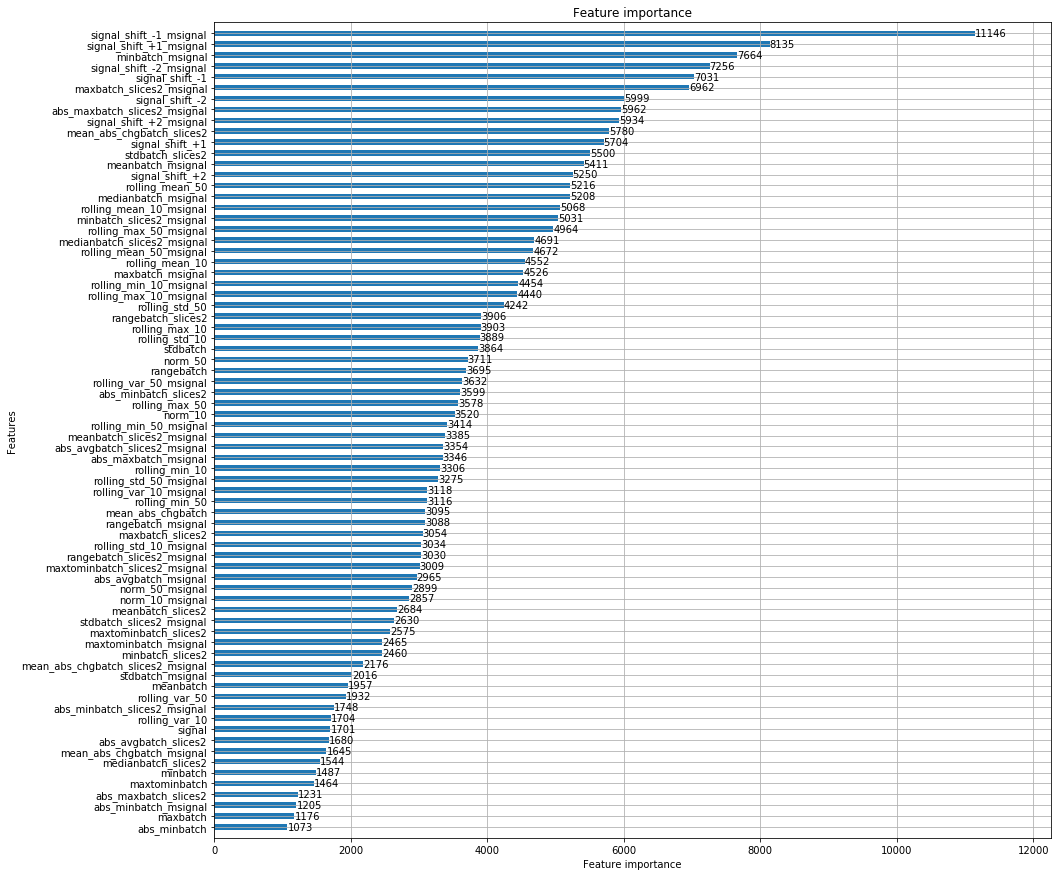

5

In [67]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
lgb.plot_importance(model,ax = axes,height = 0.5)
plt.show();plt.close()
gc.collect()

### 4.6 XGB <a class="anchor" id="4.6"></a>

[Back to Table of Contents](#0.1)

In [68]:
# Thanks to https://www.kaggle.com/teejmahal20/3-simple-ideas-ensemble
train_set = xgb.DMatrix(X_train, y_train)
val_set = xgb.DMatrix(X_valid, y_valid)
del X_train, X_valid, y_train, y_valid
gc.collect()

46

In [69]:
%%time
params_xgb = {'colsample_bytree': 0.375,
              'learning_rate': lr_xgb,
              'max_depth': max_depth_xgb, 
              'subsample': 1, 
              'objective':'reg:squarederror',
              'eval_metric':'logloss'}

modelx = xgb.train(params_xgb, train_set, num_boost_round=num_boost_round_xgb, evals=[(train_set, 'train'), (val_set, 'val')], 
                                     verbose_eval=25, early_stopping_rounds=200)
del train_set, val_set
gc.collect()

[0]	train-logloss:-0.800978	val-logloss:-0.80918
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 200 rounds.
[25]	train-logloss:-72.9026	val-logloss:-72.6199
[50]	train-logloss:-72.9293	val-logloss:-72.6564
[75]	train-logloss:-72.9347	val-logloss:-72.6626
[100]	train-logloss:-72.9368	val-logloss:-72.6647
[125]	train-logloss:-72.9378	val-logloss:-72.6655
[150]	train-logloss:-72.9385	val-logloss:-72.6657
[175]	train-logloss:-72.9389	val-logloss:-72.6657
[200]	train-logloss:-72.9391	val-logloss:-72.6657
[225]	train-logloss:-72.9393	val-logloss:-72.6656
[250]	train-logloss:-72.9394	val-logloss:-72.6657
[275]	train-logloss:-72.9395	val-logloss:-72.6656
[300]	train-logloss:-72.9396	val-logloss:-72.6654
[325]	train-logloss:-72.9397	val-logloss:-72.6654
[350]	train-logloss:-72.9397	val-logloss:-72.6653
Stopping. Best iteration:
[156]	train-logloss:-72.9386	val-logloss:-72.6658

CPU times: user 4h 36min 51s,

41

In [70]:
%%time
y_xgb_pred = modelx.predict(xgb.DMatrix(test[col]))
y_pred_train_xgb = modelx.predict(xgb.DMatrix(train[col]))
gc.collect()

CPU times: user 4min 6s, sys: 9.52 s, total: 4min 15s
Wall time: 4min 16s


42

In [71]:
print('XGB score {0:.4f}'.format(np.mean(f1_score(y, np.round(np.clip(y_pred_train_xgb,0,10)).astype(int), average="macro"))))

XGB score 0.9414


## 5. Showing Confusion Matrices <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

In [72]:
# Showing Confusion Matrix
# Thanks to https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud
def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [73]:
# Showing Confusion Matrix for Ridge model
#plot_cm(y, y_train_ridge, 'Confusion matrix for Ridge model')

In [74]:
# Showing Confusion Matrix for SGDRegressor model
#plot_cm(y, y_train_sgd, 'Confusion matrix for SGDRegressor model')

In [75]:
# # Showing Confusion Matrix for Logistic Regression
# plot_cm(y, y_logreg_train, 'Confusion matrix for Logistic Regression')

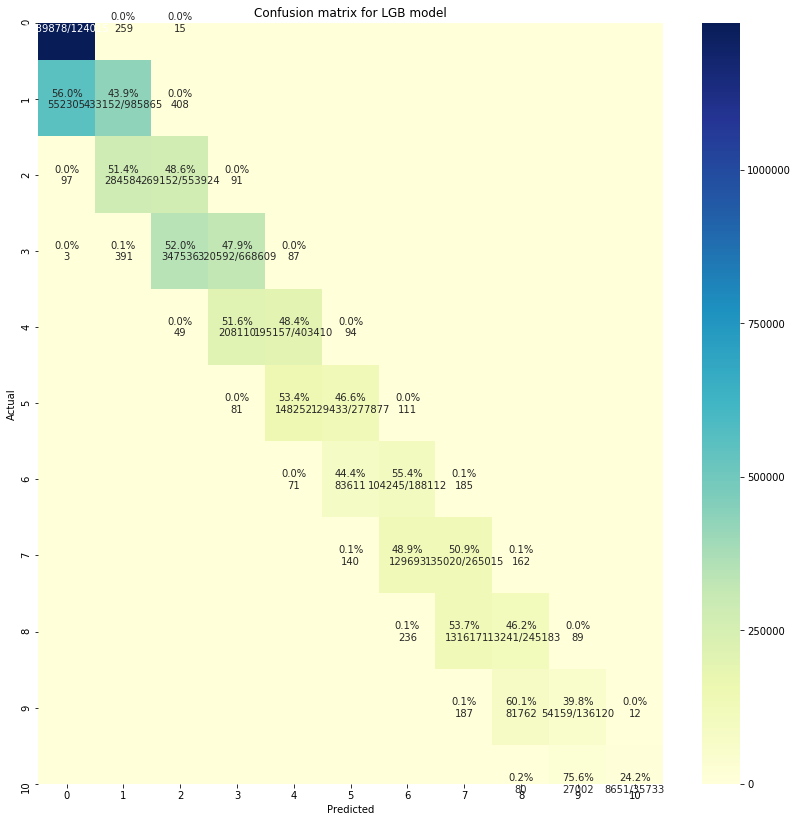

In [76]:
# Showing Confusion Matrix for LGB model
plot_cm(y, y_pred_train_lgb, 'Confusion matrix for LGB model')

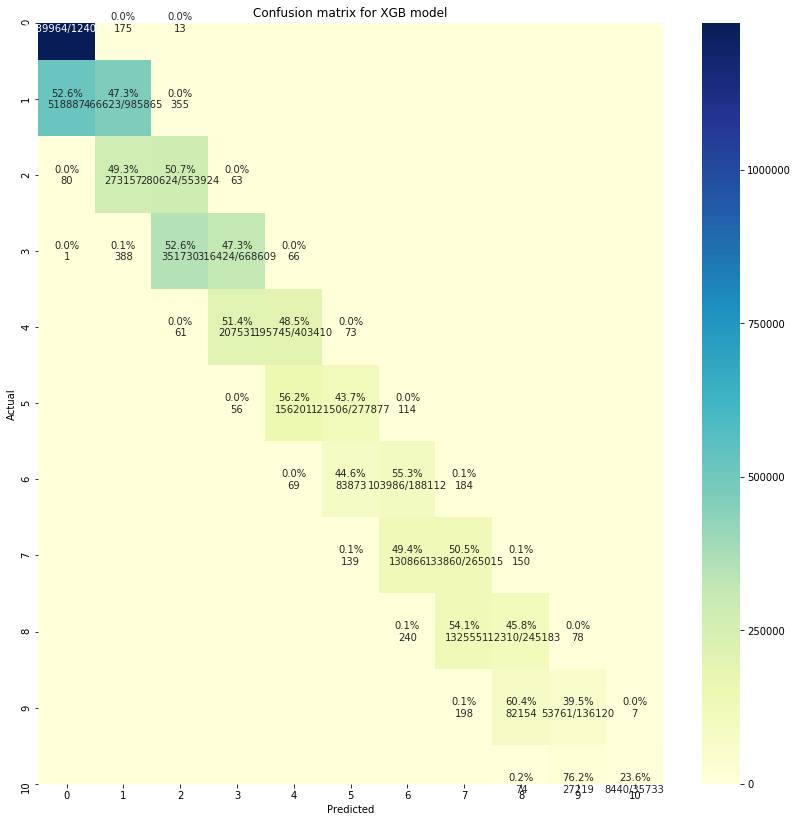

In [77]:
# Showing Confusion Matrix for LGB model
plot_cm(y, y_pred_train_xgb, 'Confusion matrix for XGB model')

In [78]:
# # Showing Confusion Matrix for MLP model
# plot_cm(y, y_pred_train_mlp, 'Confusion matrix for MLP model')

In [79]:
gc.collect()

21034

## 6. Comparison and merging solutions <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

### Merging solution

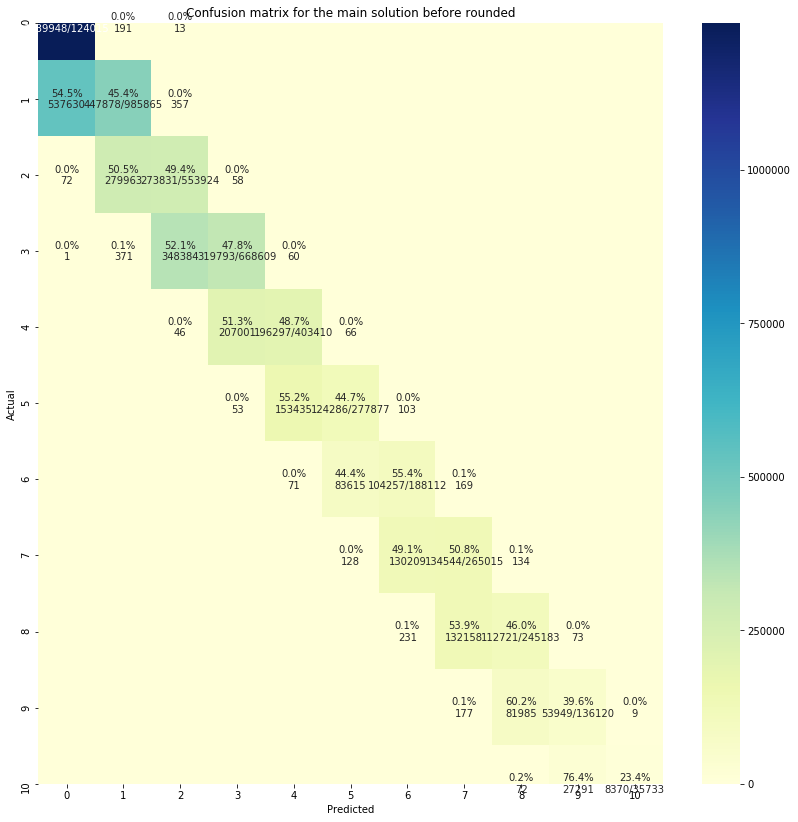

In [80]:
# Showing Confusion Matrix for the main solution before rounded
y_train_preds = w_lgb*y_pred_train_lgb + w_xgb*y_pred_train_xgb
plot_cm(y, y_train_preds, 'Confusion matrix for the main solution before rounded')

In [81]:
del y_pred_train_lgb, y_pred_train_xgb
gc.collect()

10517

In [82]:
#y_preds = w_ridge*y_preds_ridge + w_sgd*y_preds_sgd + w_logreg*y_logreg_pred + w_lgb*y_lgb_pred
#y_preds = w_logreg*y_logreg_pred + w_lgb*y_lgb_pred + w_mlp*y_mlp_pred
y_preds = w_lgb*y_lgb_pred + w_xgb*y_xgb_pred

In [83]:
del y_lgb_pred, y_xgb_pred
gc.collect()

40

### Processing prediction

In [84]:
def pred_proc(pred):
    pred = np.round(np.clip(pred, 0, 10))
    return pred.astype(int)

In [85]:
# Prediction processing for the main solution
y_preds = pred_proc(y_preds)
y_train_preds = pred_proc(y_train_preds)

### Building Confusion matrices for processing solutions

In [86]:
# Showing Confusion Matrix for processing solution of Ridge model
#plot_cm(y, pred_proc(y_train_ridge), 'Confusion matrix for processing solution of Ridge model')

In [87]:
# Showing Confusion Matrix for processing solution of SGDRegression model
#plot_cm(y, pred_proc(y_train_sgd), 'Confusion matrix for processing solution of SGDRegression model')

In [88]:
# # Showing Confusion Matrix for processing solution of Logistic Regression model
# plot_cm(y, pred_proc(y_logreg_train), 'Confusion matrix for processing solution of Logistic Regression model')

In [89]:
# # Showing Confusion Matrix for processing solution of LGB model
# plot_cm(y, pred_proc(y_pred_train_lgb), 'Confusion matrix for processing solution of LGB model')

In [90]:
# # Showing Confusion Matrix for processing solution of MLP model
# plot_cm(y, pred_proc(y_pred_train_mlp), 'Confusion matrix for processing solution of MLP model')

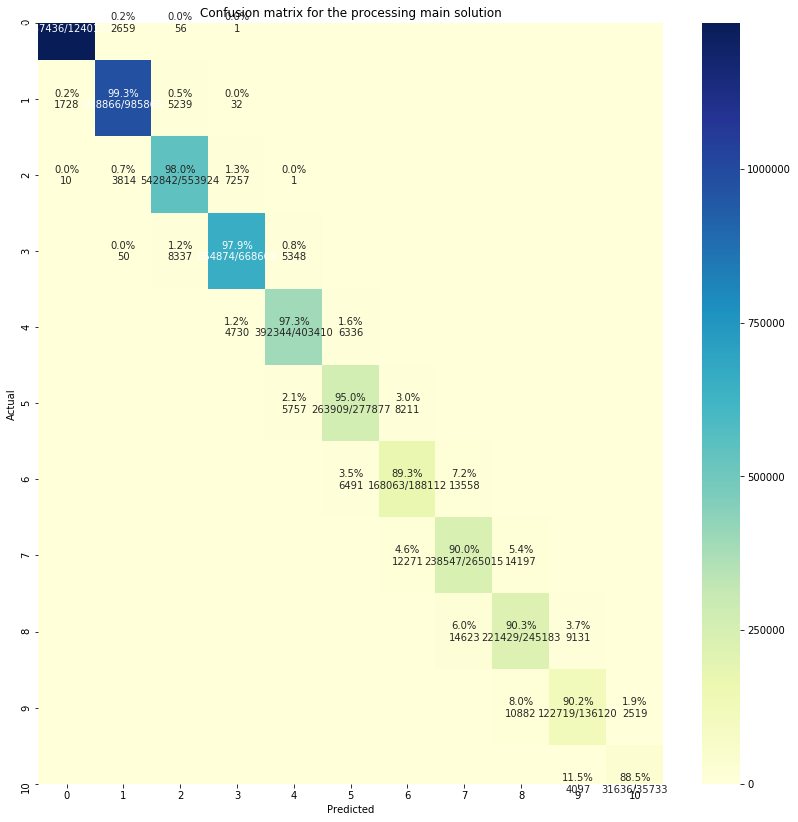

In [91]:
# Showing Confusion Matrix for the processing main solution
plot_cm(y, y_train_preds, 'Confusion matrix for the processing main solution')

In [92]:
print('The main solution score {0:.4f}'.format(np.mean(f1_score(y, y_train_preds, average="macro"))))

The main solution score 0.9429


In [93]:
del y_train_preds
gc.collect()

10537

## 7. Submission <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

In [94]:
test['open_channels'] = y_preds
test[['time','open_channels']].to_csv('submission-lgb.csv', index=False, float_format='%.4f')

In [95]:
test.head(3)

,time,signal,rolling_mean_10,rolling_std_10,rolling_var_10,rolling_min_10,rolling_max_10,norm_10,rolling_mean_50,rolling_std_50,...,abs_maxbatch_slices2_msignal,abs_minbatch_slices2_msignal,rangebatch_slices2_msignal,maxtominbatch_slices2_msignal,abs_avgbatch_slices2_msignal,signal_shift_+1_msignal,signal_shift_-1_msignal,signal_shift_+2_msignal,signal_shift_-2_msignal,open_channels
5000000.0,500.0001,-2.650391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.046875,4.445312,4.253906,3.177734,5.246094,0.000000,-0.199585,0.000000,-0.210205,0
5000001.0,500.0002,-2.849609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.250000,4.644531,4.453125,3.376953,5.445312,0.199585,-0.010597,0.000000,0.414307,0
5000002.0,500.0003,-2.859375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.257812,4.656250,4.464844,3.388672,5.457031,0.010597,0.425049,0.210205,0.244507,0


[500.0001 500.0002 500.0003 500.0004 500.0005 500.0006 500.0007 500.0008
 500.0009 500.001 ]
1.380558
AxesSubplot(0.125,0.125;0.775x0.755)


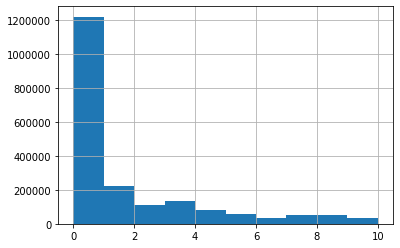

In [96]:
print(test.time.values[:10])
print(test['open_channels'].mean())
print(test['open_channels'].hist())

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

[Go to Top](#0)